In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
#import json
#from pandas.io.json import json_normalize

In [2]:
sns.set_context("talk")
sns.set_style('whitegrid', {'xtick.bottom':True, 'ytick.left':True})

# Part I

In [3]:
logins = pd.read_json('logins.json')

# agg every 15 min by count
logins_15 = logins.resample('15T', on='login_time').count().rename(columns={'login_time':'number_of_logins'})

/Applications/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


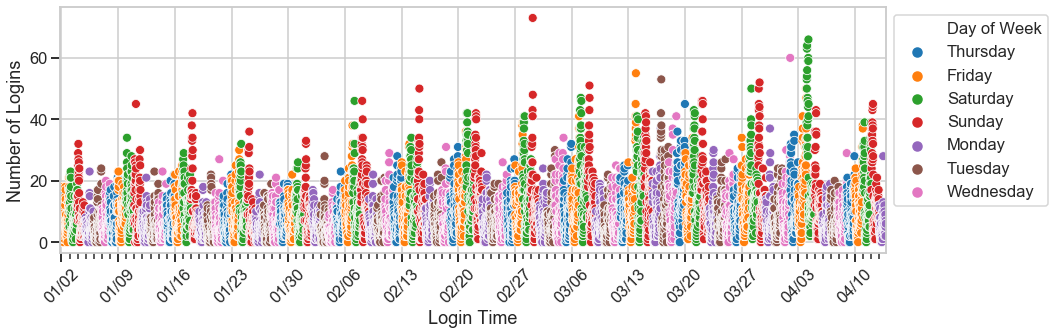

In [4]:
weekday_palette = dict(zip(range(0,7), sns.color_palette()[0:7]))
logins_15['Day of Week'] = logins_15.index.weekday_name

# plot
_ = plt.figure(figsize=(15,5))
ax = _.add_subplot()
_ = plt.xticks(rotation=45)
_ = sns.scatterplot(y='number_of_logins', x=logins_15.index, data=logins_15, hue='Day of Week')
_ = plt.xlim(logins_15.index.min(), logins_15.index.max())
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
_ = plt.ylabel('Number of Logins')
ax.set_xlabel('Login Time')
plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig('logins_by_day.png')

Text(0.5, 0, 'Login Day')

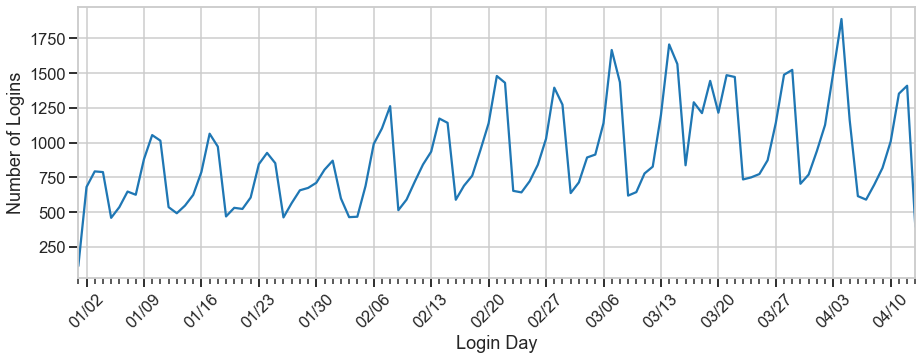

In [5]:
# trends by day
logins_by_day = logins_15['number_of_logins'].resample('1D').sum()

_ = plt.figure(figsize=(15,5))
ax = _.add_subplot()
_ = plt.xticks(rotation=45)
_ = sns.lineplot(data=logins_by_day)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
plt.xlim(logins_by_day.index.min(), logins_by_day.index.max())
_ = plt.ylabel('Number of Logins')
ax.set_xlabel('Login Day')

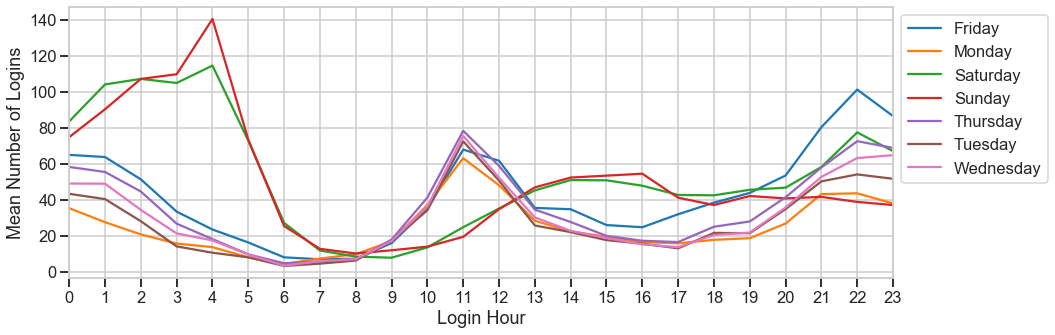

In [6]:
# daily mean login trends by day of week
logins_by_weekdayhour = logins_15['number_of_logins'].groupby([logins_15.index.date, logins_15.index.hour]).sum().reset_index()#.groupby(['level_0'.dt.weekday_name,'login_time']).mean()
logins_by_weekdayhour['level_0'] = pd.to_datetime(logins_by_weekdayhour['level_0'])
logins_by_weekdayhour['Day of Week'] = logins_by_weekdayhour['level_0'].dt.weekday_name
logins_by_weekdayhour = logins_by_weekdayhour.groupby(['Day of Week', 'login_time']).mean().reset_index()

_ = plt.figure(figsize=(15,5))
_ = plt.xticks(np.arange(0,25))
for day in logins_by_weekdayhour['Day of Week'].unique():
    _ = sns.lineplot(x='login_time', y='number_of_logins',
                     data=logins_by_weekdayhour[logins_by_weekdayhour['Day of Week']==day],
                     label=day)
_ = plt.xlim(0,23)
_ = plt.ylabel('Mean Number of Logins')
_ = plt.xlabel('Login Hour')
_ = plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig('login_by_hour_and_day.png')

# Part III

In [7]:
import json
data = pd.DataFrame(json.load((open('ultimate_data_challenge.json'))))
data['last_trip_date'] = pd.to_datetime(data['last_trip_date'])
data['signup_date'] = pd.to_datetime(data['signup_date'])
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [8]:
# some null avg ratings and phone numbers
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


In [9]:
data[data['trips_in_first_30_days']==0].describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,15390.000000,15296.000000,11641.000000,15390.000000,15390.000000,15390.0,15390.000000
mean,6.397854,4.791200,4.632721,1.071320,8.512982,0.0,61.299350
std,6.527654,0.499961,0.655351,0.238503,22.000314,0.0,41.312242
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.0,0.000000
25%,2.350000,4.800000,4.500000,1.000000,0.000000,0.0,16.700000
50%,4.150000,5.000000,5.000000,1.000000,0.000000,0.0,75.000000
75%,8.060000,5.000000,5.000000,1.000000,0.000000,0.0,100.000000
max,160.960000,5.000000,5.000000,5.000000,100.000000,0.0,100.000000


Text(0.5, 1.0, 'Number of Trips for Retained Customers')

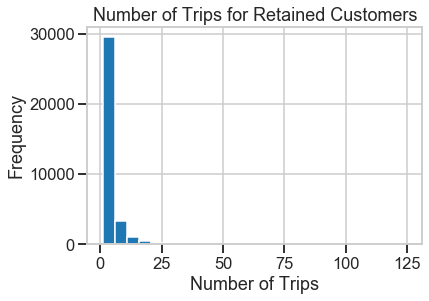

In [10]:
# most retained customers take less than ~6 trips in their first month
data.loc[data['trips_in_first_30_days']!=0, 'trips_in_first_30_days'].plot(kind='hist', bins=25)
plt.xlabel('Number of Trips')
plt.title('Number of Trips for Retained Customers')

Text(0, 0.5, 'Average Rating by Driver')

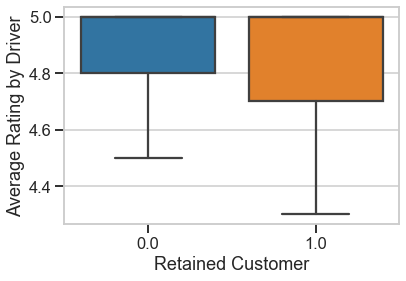

In [11]:
data.loc[data['trips_in_first_30_days']==0, 'retained_customer'] = 0
data['retained_customer'] = data['retained_customer'].fillna(1)

sns.boxplot(x='retained_customer', y='avg_rating_by_driver', data=data, showfliers=False)
plt.xlabel('Retained Customer')
plt.ylabel('Average Rating by Driver')

Text(0, 0.5, 'Average Rating of Driver')

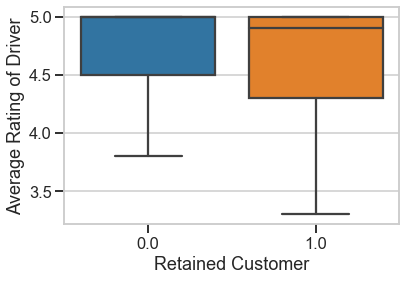

In [12]:
sns.boxplot(x='retained_customer', y='avg_rating_of_driver', data=data, showfliers=False)
plt.xlabel('Retained Customer')
plt.ylabel('Average Rating of Driver')

Text(0, 0.5, 'Average Surge Multiplier')

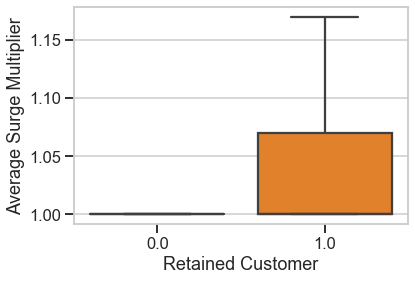

In [13]:
sns.boxplot(x='retained_customer', y='avg_surge', data=data, showfliers=False)
plt.xlabel('Retained Customer')
plt.ylabel('Average Surge Multiplier')

Text(0, 0.5, 'Percentage of Trips with Surge Pricing')

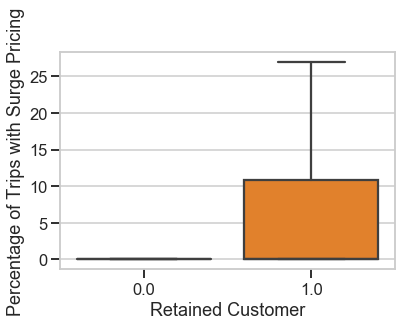

In [14]:
sns.boxplot(x='retained_customer', y='surge_pct', data=data, showfliers=False)
plt.xlabel('Retained Customer')
plt.ylabel('Percentage of Trips with Surge Pricing')

In [15]:
data['retained_customer'].value_counts(normalize=True)

1.0    0.6922
0.0    0.3078
Name: retained_customer, dtype: float64

In [16]:
# identify customers with long-term retention
data['months_active'] = (data['last_trip_date']-data['signup_date'])/np.timedelta64(1, 'M')
data.loc[data['months_active']>5, 'long_term_retention'] = 1
data['long_term_retention'] = data['long_term_retention'].fillna(0)

# of retained customers, only ~23% are active in month 6
data.loc[data['retained_customer']==1, 'long_term_retention'].value_counts(normalize=True)

0.0    0.765357
1.0    0.234643
Name: long_term_retention, dtype: float64

In [17]:
# convert boolean to 1 or 0
data['ultimate_black_user'] = data['ultimate_black_user'].replace({True:1, False:0})

# get dummies for categorical data
city_data = pd.get_dummies(data['city'])
phone_data = pd.get_dummies(data['phone'])
data_clean = data.merge(city_data, left_index=True, right_index=True).merge(phone_data, left_index=True, right_index=True)
data_clean = data_clean.drop(columns=['city', 'phone', 'last_trip_date', 'signup_date', 'months_active'])
data_clean = data_clean.dropna()
data_clean.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained_customer,long_term_retention,Astapor,King's Landing,Winterfell,Android,iPhone
0,3.67,5.0,4.7,1.10,15.4,4,1,46.2,1.0,0.0,0,1,0,0,1
1,8.26,5.0,5.0,1.00,0.0,0,0,50.0,0.0,0.0,1,0,0,1,0
2,0.77,5.0,4.3,1.00,0.0,3,0,100.0,1.0,0.0,1,0,0,0,1
3,2.36,4.9,4.6,1.14,20.0,9,1,80.0,1.0,1.0,0,1,0,0,1
4,3.13,4.9,4.4,1.19,11.8,14,0,82.4,1.0,0.0,0,0,1,1,0


In [18]:
data_clean.corr()[['long_term_retention']].sort_values('long_term_retention')

,long_term_retention
Android,-0.174875
Astapor,-0.129445
avg_dist,-0.087348
avg_rating_by_driver,-0.028648
avg_rating_of_driver,-0.007967
Winterfell,-0.007947
weekday_pct,-0.003555
avg_surge,0.006792
surge_pct,0.018634
retained_customer,0.042579


Tuned logistic regression parameter: {'C': 0.1}
Accuracy score: 0.7558
AUC: 0.5589


Text(0.5, 1.0, 'Logistic Regression ROC Curve')

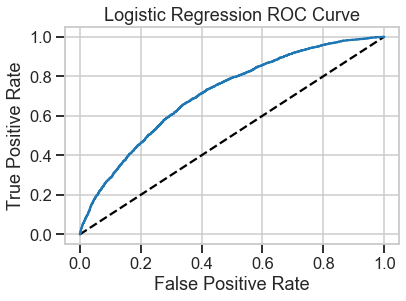

In [19]:
# create logistic regression model for retention
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Create the hyperparameter grid
Cs = [0.001, 0.1, 1, 10, 100]
param_grid = {'C': Cs}

# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(data_clean.drop(columns='long_term_retention'), 
                                                    data_clean['long_term_retention'],
                                                    random_state=5)

lr = LogisticRegression(solver='liblinear')
m = GridSearchCV(lr, param_grid, cv=5)

# Fit it to the training data
m.fit(X_train, y_train)

# print optimal paramaters and accuracy metrics
print("Tuned logistic regression parameter: {}".format(m.best_params_))
print('Accuracy score: {:.4f}'.format(accuracy_score(m.predict(X_test), y_test)))
print('AUC: {:.4f}'.format(roc_auc_score(y_test, m.predict(X_test))))

y_pred_prob = m.predict_proba(X_test)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')

In [20]:
# what would the accuracy be if we just assume everyone is not retained?
print('Accuracy score if all customers not retained: {:.4f}'.format(accuracy_score([0 for i in range(len(y_test))], y_test)))

Accuracy score if all customers not retained: 0.7466


In [21]:
lr = LogisticRegression(solver='liblinear', C=10)
lr.fit(X_train, y_train)

# look at coefficients for each feature
pd.DataFrame(zip(data_clean.drop(columns='long_term_retention').columns, lr.coef_[0]), columns=['Feature', 'Coefficient']).sort_values('Coefficient', ascending=False)

,Feature,Coefficient
6,ultimate_black_user,0.697418
10,King's Landing,0.544395
13,iPhone,0.379603
5,trips_in_first_30_days,0.086530
4,surge_pct,0.005080
7,weekday_pct,-0.001097
2,avg_rating_of_driver,-0.031258
0,avg_dist,-0.043628
11,Winterfell,-0.100732
8,retained_customer,-0.145159


Top features using coefficients: surge_pct, trips_in_first_30_days, ultimate_black_user, King's Landing, iPhone
Tuned logistic regression parameter: {'C': 1}
Accuracy score: 0.7540
AUC: 0.5454


Text(0.5, 1.0, 'Logistic Regression w/ Feature Selection via Coefficients ROC Curve')

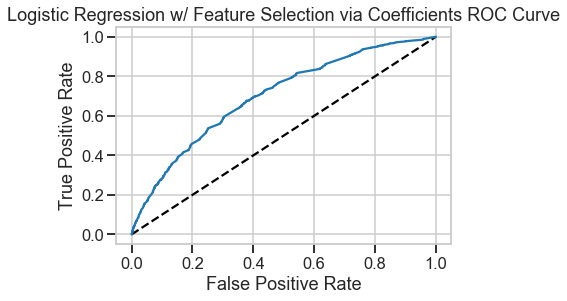

In [23]:
# keep postiive coefficients and retrain model to see if that improves accuracy

coef_features_to_keep = data_clean.drop(columns='long_term_retention').columns[lr.coef_[0]>0].to_list()
print('Top features using coefficients: {}'.format(', '.join(coef_features_to_keep)))

# model using top features from positive coefficients
X1_train, X1_test, y1_train, y1_test = train_test_split(data_clean[coef_features_to_keep], 
                                                    data_clean['long_term_retention'],
                                                    random_state=5)

m1 = LogisticRegression(solver='liblinear')
m1cv = GridSearchCV(m1, param_grid, cv=5)

# Fit it to the training data
m1cv.fit(X1_train, y1_train)

# print optimal paramaters and accuracy metrics
print("Tuned logistic regression parameter: {}".format(m1cv.best_params_))
print('Accuracy score: {:.4f}'.format(accuracy_score(m1cv.predict(X1_test), y1_test)))
print('AUC: {:.4f}'.format(roc_auc_score(y1_test, m1cv.predict(X1_test))))

#logistic regression roc curve
y_pred_prob = m1cv.predict_proba(X1_test)[:,1]
fpr, tpr, thresholds  = roc_curve(y1_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression w/ Feature Selection via Coefficients ROC Curve')

Accuracy score: 0.7826
AUC: 0.6450


Text(0.5, 1.0, 'Gradient Boosting ROC Curve')

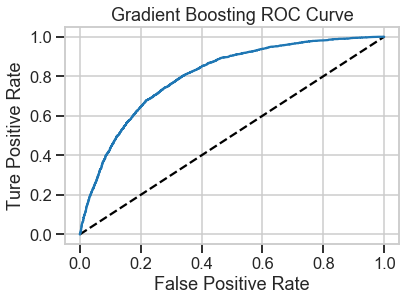

In [24]:
# gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

# print optimal paramaters and accuracy metrics
print('Accuracy score: {:.4f}'.format(accuracy_score(gbc.predict(X_test), y_test)))
print('AUC: {:.4f}'.format(roc_auc_score(y_test, gbc.predict(X_test))))

y_pred_prob = gbc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('Ture Positive Rate')
plt.title('Gradient Boosting ROC Curve')

Accuracy score: 0.7549
AUC: 0.6285


Text(0.5, 1.0, 'Random Forest ROC Curve')

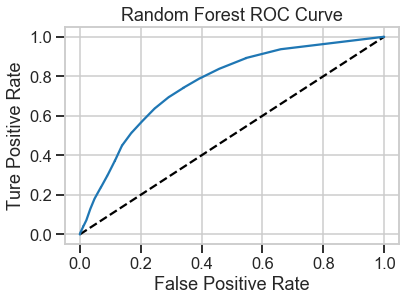

In [25]:
# random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=20)
rfc.fit(X_train, y_train)

# model accuracy
print('Accuracy score: {:.4f}'.format(accuracy_score(rfc.predict(X_test), y_test)))
print('AUC: {:.4f}'.format(roc_auc_score(y_test, rfc.predict(X_test))))

# roc curve
y_pred_prob = rfc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('Ture Positive Rate')
plt.title('Random Forest ROC Curve')

The best model appears to be the Gradient Boosting Classifier, so next, we'll tune the parameters for that. I've tuned them in groups in order of importance.

In [26]:
# gradient boosting parameter tuning
from sklearn.ensemble import GradientBoostingClassifier

# tune paramaters sequentially by importance
param_grid = {'n_estimators':range(20,101,10)}
gbc = GradientBoostingClassifier(learning_rate=0.1, random_state=5)
gbc_cv = GridSearchCV(gbc, param_grid, cv=5)
gbc_cv.fit(X_train, y_train)

# print optimal paramaters and accuracy metrics
print("Tuned parameter: {}".format(gbc_cv.best_params_))
print('Accuracy score: {:.4f}'.format(accuracy_score(gbc_cv.predict(X_test), y_test)))
print('AUC: {:.4f}'.format(roc_auc_score(y_test, gbc_cv.predict(X_test))))

Tuned parameter: {'n_estimators': 100}
Accuracy score: 0.7826
AUC: 0.6450


In [27]:
param_grid = {'max_depth':range(5,21,2),
              'min_samples_split':range(100, 501, 100)}
gbc = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, random_state=5)
gbc_cv = GridSearchCV(gbc, param_grid, cv=5)
gbc_cv.fit(X_train, y_train)

# print optimal paramaters and accuracy metrics
print("Tuned parameter: {}".format(gbc_cv.best_params_))
print('Accuracy score: {:.4f}'.format(accuracy_score(gbc_cv.predict(X_test), y_test)))
print('AUC: {:.4f}'.format(roc_auc_score(y_test, gbc_cv.predict(X_test))))

Tuned parameter: {'max_depth': 5, 'min_samples_split': 200}
Accuracy score: 0.7824
AUC: 0.6509


In [28]:
param_grid = {'min_samples_leaf':range(1,71,10),
              'max_features':range(7,15,2)}

gbc = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=5, min_samples_split=200,
                                 random_state=5)
gbc_cv = GridSearchCV(gbc, param_grid, cv=5)
gbc_cv.fit(X_train, y_train)

# print optimal paramaters and accuracy metrics
print("Tuned parameter: {}".format(gbc_cv.best_params_))
print('Accuracy score: {:.4f}'.format(accuracy_score(gbc_cv.predict(X_test), y_test)))
print('AUC: {:.4f}'.format(roc_auc_score(y_test, gbc_cv.predict(X_test))))

Tuned parameter: {'max_features': 7, 'min_samples_leaf': 31}
Accuracy score: 0.7855
AUC: 0.6578


In [29]:
param_grid = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9,1.0]}

gbc = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=5, min_samples_split=200,
                                 min_samples_leaf=31, max_features=7, random_state=5)
gbc_cv = GridSearchCV(gbc, param_grid, cv=5)
gbc_cv.fit(X_train, y_train)

# print optimal paramaters and accuracy metrics
print("Tuned parameter: {}".format(gbc_cv.best_params_))
print('Accuracy score: {:.4f}'.format(accuracy_score(gbc_cv.predict(X_test), y_test)))
print('AUC: {:.4f}'.format(roc_auc_score(y_test, gbc_cv.predict(X_test))))

Tuned parameter: {'subsample': 1.0}
Accuracy score: 0.7855
AUC: 0.6578


Accuracy score: 0.7855
AUC: 0.6578


Text(0.5, 1.0, 'Tuned Gradient Boosting ROC Curve')

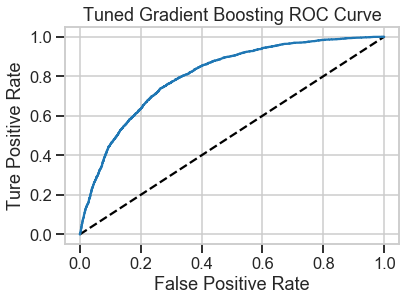

In [30]:
gbc = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=5, min_samples_split=200,
                                 min_samples_leaf=31, max_features=7, subsample=1, random_state=5)
gbc.fit(X_train, y_train)

# print optimal paramaters and accuracy metrics
print('Accuracy score: {:.4f}'.format(accuracy_score(gbc.predict(X_test), y_test)))
print('AUC: {:.4f}'.format(roc_auc_score(y_test, gbc.predict(X_test))))

# roc curve
y_pred_prob = gbc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('Ture Positive Rate')
plt.title('Tuned Gradient Boosting ROC Curve')

Using the trained model, we can examine the importance of various features to better understand how retention is determined.

In [31]:
pd.DataFrame(zip(gbc.feature_importances_, data_clean.drop(columns='long_term_retention').columns), 
             columns=['Feature Importance', 'Feature']).sort_values('Feature Importance', ascending=False)

,Feature Importance,Feature
4,0.220475,surge_pct
1,0.166374,avg_rating_by_driver
7,0.126903,weekday_pct
3,0.114715,avg_surge
10,0.068315,King's Landing
6,0.054389,ultimate_black_user
5,0.051851,trips_in_first_30_days
12,0.047851,Android
0,0.038796,avg_dist
9,0.035387,Astapor


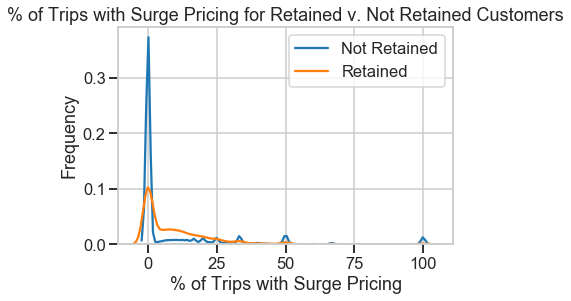

In [32]:
_ = sns.distplot(data_clean.loc[data_clean['long_term_retention']==0, 'surge_pct'], hist=False, norm_hist=True, bins=25, 
              label='Not Retained')
_ = sns.distplot(data_clean.loc[data_clean['long_term_retention']==1, 'surge_pct'], hist=False, norm_hist=True, bins=25, 
              label='Retained')
_ = plt.legend()
_ = plt.title('% of Trips with Surge Pricing for Retained v. Not Retained Customers')
_ = plt.xlabel('% of Trips with Surge Pricing')
_ = plt.ylabel('Frequency')

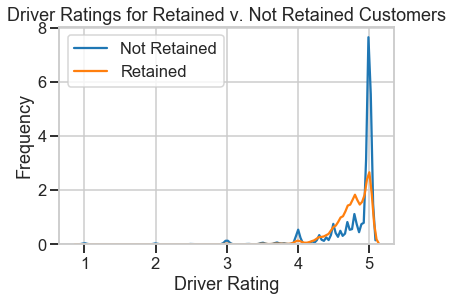

In [33]:
_ = sns.distplot(data_clean.loc[data_clean['long_term_retention']==0, 'avg_rating_by_driver'], hist=False, norm_hist=True, bins=25, 
              label='Not Retained')
_ = sns.distplot(data_clean.loc[data_clean['long_term_retention']==1, 'avg_rating_by_driver'], hist=False, norm_hist=True, bins=25, 
              label='Retained')
_ = plt.legend()
_ = plt.title('Driver Ratings for Retained v. Not Retained Customers')
_ = plt.xlabel('Driver Rating')
_ = plt.ylabel('Frequency')

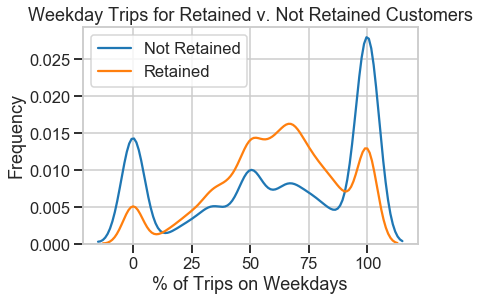

In [34]:
_ = sns.distplot(data_clean.loc[data_clean['long_term_retention']==0, 'weekday_pct'], hist=False, norm_hist=True, bins=25, 
              label='Not Retained')
_ = sns.distplot(data_clean.loc[data_clean['long_term_retention']==1, 'weekday_pct'], hist=False, norm_hist=True, bins=25, 
              label='Retained')
_ = plt.legend()
_ = plt.title('Weekday Trips for Retained v. Not Retained Customers')
_ = plt.xlabel('% of Trips on Weekdays')
_ = plt.ylabel('Frequency')

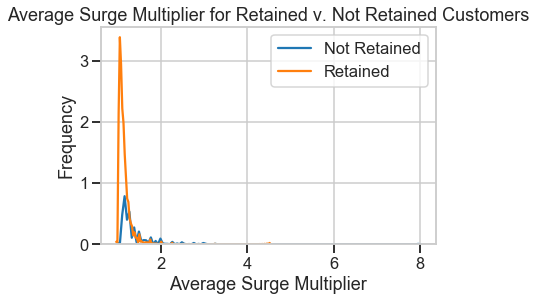

In [35]:
_ = sns.distplot(data_clean.loc[data_clean['long_term_retention']==0, 'avg_surge'], hist=False, norm_hist=True, bins=25, 
              label='Not Retained')
_ = sns.distplot(data_clean.loc[data_clean['long_term_retention']==1, 'avg_surge'], hist=False, norm_hist=True, bins=25, 
              label='Retained')
_ = plt.legend()
_ = plt.title('Average Surge Multiplier for Retained v. Not Retained Customers')
_ = plt.xlabel('Average Surge Multiplier')
_ = plt.ylabel('Frequency')

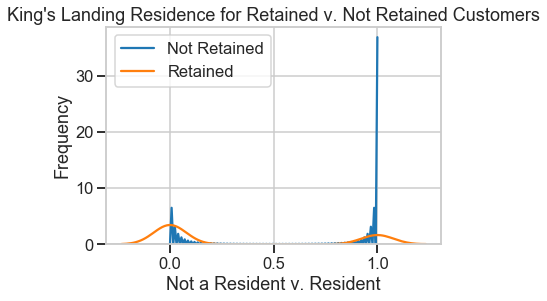

In [36]:
_ = sns.distplot(data_clean.loc[data_clean['long_term_retention']==0, 'King\'s Landing'], hist=False, norm_hist=True, bins=25, 
              label='Not Retained')
_ = sns.distplot(data_clean.loc[data_clean['long_term_retention']==1, 'King\'s Landing'], hist=False, norm_hist=True, bins=25, 
              label='Retained')
_ = plt.legend()
_ = plt.title('King\'s Landing Residence for Retained v. Not Retained Customers')
_ = plt.xlabel('Not a Resident v. Resident')
_ = plt.ylabel('Frequency')

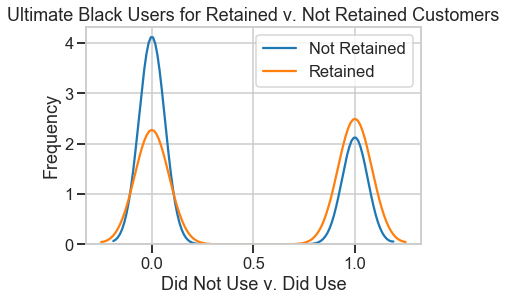

In [37]:
_ = sns.distplot(data_clean.loc[data_clean['long_term_retention']==0, 'ultimate_black_user'], hist=False, norm_hist=True, bins=25, 
              label='Not Retained')
_ = sns.distplot(data_clean.loc[data_clean['long_term_retention']==1, 'ultimate_black_user'], hist=False, norm_hist=True, bins=25, 
              label='Retained')
_ = plt.legend()
_ = plt.title('Ultimate Black Users for Retained v. Not Retained Customers')
_ = plt.xlabel('Did Not Use v. Did Use')
_ = plt.ylabel('Frequency')